In [208]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

In [209]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = 'cpu'
print(device)

cuda


In [210]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 200)
        self.fc2 = nn.Linear(200, 900)
        self.fc3 = nn.Linear(900, 1)

        self.i = 1j

        self.optimizer = torch.optim.Adam(self.parameters(),lr=1e-3)

        self.itstart = 1
        self.itend = 0

    def forward(self, x):
        x = F.tanh(self.fc1(x))
        x = torch.sin(x)
        x = F.tanh(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def loss_fn(self,predictions,targets):
        return torch.mean((predictions-targets)**2)
    
    
    def train(self,x,y,epochs):
        self.itstart = self.itend+1
        self.itend += epochs+1
        for epoch in range(self.itstart,self.itend):
            predictions = self.forward(x)
            loss = self.loss_fn(predictions,y)
            loss.backward()
            self.optimizer.step()
            self.optimizer.zero_grad()
            if epoch % 10000 == 0:
                print("Epoch:",epoch,"\t Loss:", loss.item())
    def plot(self,x,target):
        y = self.forward(x)
        plt.figure()
        plt.plot(x.detach().cpu().numpy(),y.detach().cpu().numpy(),label = 'predicted')
        plt.plot(x.detach().cpu().numpy(),target,label='targets')
        plt.legend()
        plt.show()


net = Net()
net.to(device)
print(net)

Net(
  (fc1): Linear(in_features=1, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=900, bias=True)
  (fc3): Linear(in_features=900, out_features=1, bias=True)
)


In [211]:
# pytorch_total_params = sum(p.numel() for p in net.parameters())
pytorch_total_params = sum(p.numel() for p in net.parameters() if p.requires_grad)

print(pytorch_total_params)

182201


In [212]:
x = np.linspace(0,50,endpoint=True,num=1000)
y = np.sin(x)**2*x
xTensor = torch.tensor(x,dtype=torch.float32).reshape(-1,1)
yTensor = torch.tensor(y,dtype=torch.float32).reshape(-1,1)
xGPU = xTensor.to(device)
yGPU = yTensor.to(device)

Epoch: 10000 	 Loss: 21.081708908081055
Epoch: 20000 	 Loss: 0.6459450721740723
Epoch: 30000 	 Loss: 0.8103901147842407


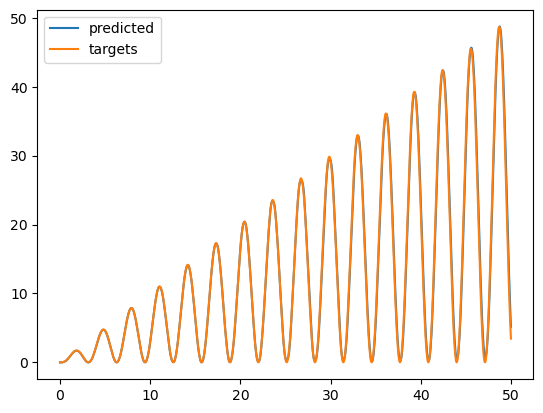

In [214]:
epochs = int(25000)
net.train(xGPU,yGPU,epochs)
net.plot(xGPU,y)